<a href="https://colab.research.google.com/github/JazminRivas/C-lculo-num-rico-1er-cuatri-2024/blob/main/guia_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
from scipy.optimize import curve_fit
import pandas as pd

Ejercicio 1

Escribir un programa que reciba como datos dos vectores x e y y un numero n
y devuelva un vector con los coeficientes del polinomio de grado n que mejor ajusta la tabla
dada por x e y en el sentido de cuadrados mınimos.


In [3]:
def cuadrados_minimos(x,y,n):
    A = np.vander(x,n+1) #tiene n+1 columnas porque tiene n+1 coeficientes (n es el grado)
    ATA = A.T@A
    ATb = A.T@y
    coeficientes = np.linalg.solve(ATA, ATb)
    return coeficientes

#pruebo con un ejemplo
x = [-1,0,1,2]
y = [0,2,-4,2]
print(np.polyfit(x,y,2))
print(cuadrados_minimos(x, y, 2)) #funciona Ok

[ 1. -1. -1.]
[ 1. -1. -1.]


Ejercicio 2

a) Encontrar el polinomio de grado 1 que aproxima en el sentido de cuadrados mínimos la siguiente tabla de datos:


\begin{array}{|c|c|}
\hline
x & y \\
\hline
0 & -0.1 \\
1 & 1.1 \\
2 & 1.9 \\
3 & 3.2 \\
4 & 3.8 \\
5 & 5 \\
6 & 6 \\
7 & 7.3 \\
8 & 8.1 \\
9 & 8.9 \\
\hline
\end{array}

b) Encontrar el polinomio de grado 2 que aproxima en el mismo sentido la siguiente tabla de datos:


\begin{array}{|c|c|}
\hline
x & y \\
\hline
-1 & 6.1 \\
0 & 2.8 \\
1 & 2.2 \\
3 & 6 \\
6 & 26.9 \\
\hline
\end{array}



[ 1.05836364 -0.33163636]


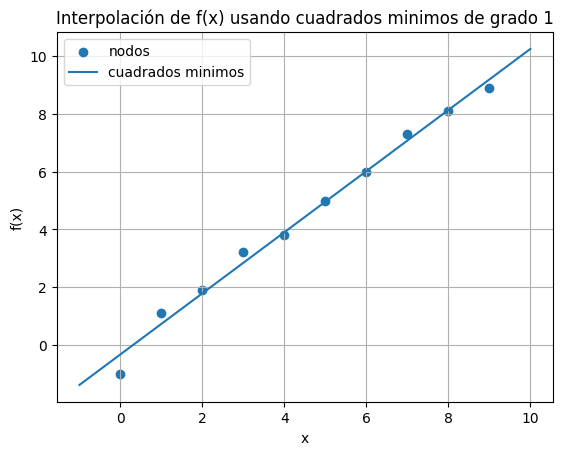

[ 0.99405594 -1.98566434  3.03006993]


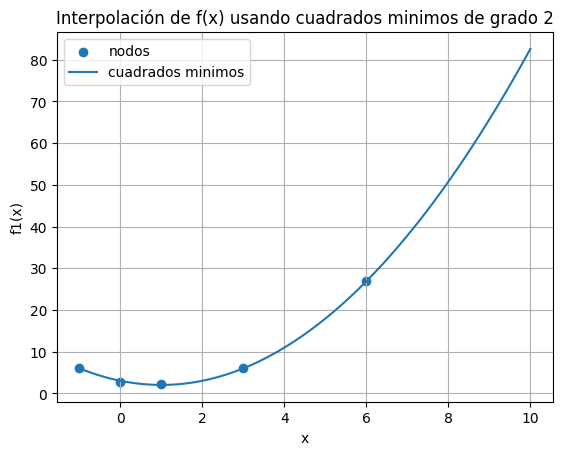

In [8]:
#ej 2 A
x = [n for n in range(0,10)]
y = [-1,1.11,1.9,3.2,3.8,5,6,7.3,8.1,8.9]
print(cuadrados_minimos(x, y, 1))

#grafico para comparar
x1 = cuadrados_minimos(x,y,1)
x_graf = np.linspace(-1,10,100)
plt.scatter(x,y, label = "nodos")
plt.plot(x_graf,np.poly1d(x1)(x_graf), label = "cuadrados minimos")
plt.title('Interpolación de f(x) usando cuadrados minimos de grado 1')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

#B
xb = [-1,0,1,3,6]
yb = [6.1,2.8,2.2,6,26.9]
x2 = cuadrados_minimos(xb, yb, 2)
print(cuadrados_minimos(xb, yb, 2))
plt.scatter(xb,yb, label = "nodos")
plt.plot(x_graf,np.poly1d(x2)(x_graf), label = "cuadrados minimos")
plt.title('Interpolación de f(x) usando cuadrados minimos de grado 2')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.legend()
plt.grid(True)
plt.show()

jercicio 4

El archivo `notas.csv` contiene los porcentajes de asistencia a los laboratorios de Cálculo Numérico y la nota obtenida en el final de la materia, por un grupo de alumnos.Realizar un ajuste lineal y un ajuste cuadr´atico de los datos. A partir de cada ajuste, ¿que
porcentaje de asistencia a los laboratorios serıa recomendable alcanzar si se quiere obtener al menos un 8 en el final?

Para leer los datos del archivo, puedes usar la biblioteca `pandas`. La siguiente secuencia levanta el archivo y almacena los datos en una matriz $A$:



import pandas as pd

data = pd.read_csv("notas.csv")

A = data.to_numpy()

In [11]:
data = pd.read_csv("notas.csv") #correr en anaconda o vscode, acá no anda
A = data.to_numpy()
x = A[:,0]
y = A[:,1]
lineal = cuadrados_minimos(x,y,1)
cuadratico = cuadrados_minimos(x,y,2)
print("el ajuste lineal es",np.poly1d(lineal))
print("el ajuste cuadratico es", np.poly1d(cuadratico))
#Para encontrar el porcentaje necesario,tengo que resolver cuando y=8.
#Empiezo con el lineal, la ecuacion es 0.7253x+3.389 = 8
print("el porcentaje recomendable según el ajuste lineal es",(8-lineal[1])/lineal[0])
#Para el segundo tengo que resolver la ecuacion 0.0007126x^2 + 0.001366x+4.881 = 8 --> 0.0007126x^2 + 0.001366x -3.119 = 0. Busco las raices y devuelvo la que sea mayor a 0
raices = np.roots([cuadratico[0],cuadratico[1],cuadratico[2]-8])
for raiz in raices:
    if raiz > 0 :
        print("el porcentaje recomendable según el ajuste cuadratico es",raiz)

FileNotFoundError: [Errno 2] No such file or directory: '/path/to/your/file/notas.csv'

Ejercicio 5

Considerar la función $f(x) = \frac{1}{1 + 25x^2} $ en el intervalo $[-1,1]$. Para $ n = 5, 10, 15 $, graficar simultáneamente $ f $ junto con:

1. Los polinomios que aproximan a \( f \) en el sentido de cuadrados mínimos en $n + 1 $ puntos equiespaciados y tienen grado $ \frac{2}{5}n $ y $ \frac{4}{5}n $.
2. El polinomio que resulta de interpolar a $ f $ en los puntos anteriores.

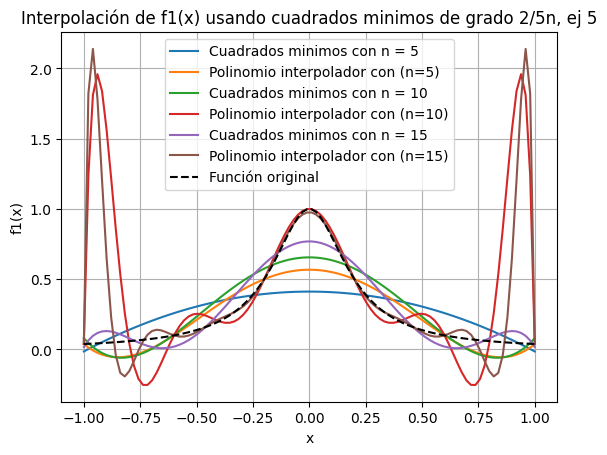

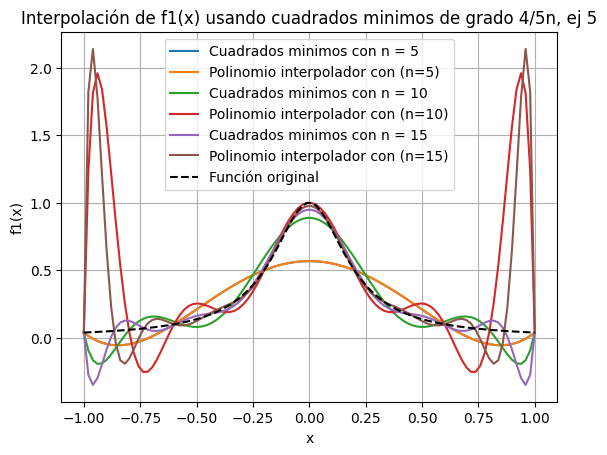

In [12]:
def f_a(x):
    return 1/(1+25*x**2)
# Defino puntos para graficar la función original
x_grafico = np.linspace(-1, 1, 100)
y_original = f_a(x_grafico)
valores_n = [5,10,15]
for n in valores_n:
    x_cuadrados_minimos = np.linspace(-1,1,n+1)
    y = f_a(x_cuadrados_minimos)
    coef = cuadrados_minimos(x_cuadrados_minimos, y, int((2/5)*n))
    plt.plot(x_grafico,np.polyval(coef, x_grafico),label= "Cuadrados minimos con n = " + str(n))
    plt.plot(x_grafico,np.poly1d(np.polyfit(x_cuadrados_minimos,f_a(x_cuadrados_minimos),n))(x_grafico),label = "Polinomio interpolador con (n=" + str(n) + ")")
plt.plot(x_grafico, y_original, 'k--', label='Función original')

# Configuración de la gráfica
plt.title('Interpolación de f1(x) usando cuadrados minimos de grado 2/5n, ej 5')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.legend()
plt.grid(True)
plt.show()

for n in valores_n:
    x_cuadrados_minimos = np.linspace(-1,1,n+1)
    y = f_a(x_cuadrados_minimos)
    coef = cuadrados_minimos(x_cuadrados_minimos, y, int((4/5)*n))
    plt.plot(x_grafico,np.polyval(coef, x_grafico),label= "Cuadrados minimos con n = " + str(n))
    plt.plot(x_grafico,np.poly1d(np.polyfit(x_cuadrados_minimos,f_a(x_cuadrados_minimos),n))(x_grafico),label = "Polinomio interpolador con (n=" + str(n) + ")")
plt.plot(x_grafico, y_original, 'k--', label='Función original')
# Configuración de la gráfica
plt.title('Interpolación de f1(x) usando cuadrados minimos de grado 4/5n, ej 5')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.legend()
plt.grid(True)
plt.show()

Ejercicio 6

Aproximar los datos de la tabla siguiente con un modelo de la forma $ f(x) \sim ae^{bx} $ en el sentido de cuadrados mínimos para la función $ \ln(f(x)) $:


\begin{array}{|c|c|}
\hline
x & y \\
\hline
-1 & 8.1 \\
0 & 3 \\
1 & 1.1 \\
2 & 0.5 \\
\hline
\end{array}


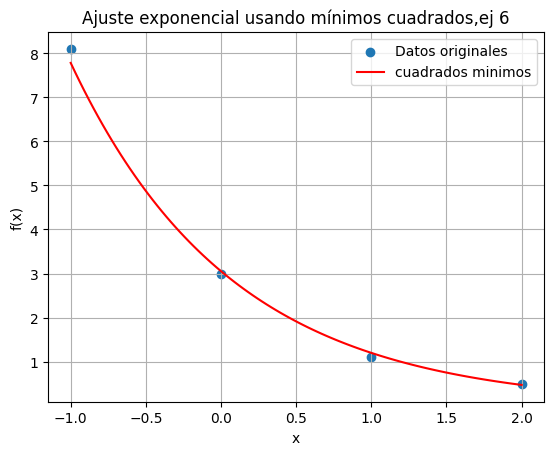

In [13]:
#ej 6, si f(x) = ae^bx --> Ln(f(x))=Ln(a) + bx que es una recta
x_ej6 = np.array([-1, 0, 1, 2])
y_ej6 = np.array([8.1, 3, 1.1, 0.5])
ln_y = np.log(y_ej6)
x_grafico = np.linspace(-1, 2, 100)
coefs = cuadrados_minimos(x_ej6, ln_y, 1) #xq es una recta que devuelve Ln(a) + bx
a = np.exp(coefs[1])
y_interpolado_ej6 = a*np.exp(coefs[0]*x_grafico)


plt.scatter(x_ej6, y_ej6, label='Datos originales')
plt.plot(x_grafico, y_interpolado_ej6, label="cuadrados minimos", color='red')

# Configuración de la gráfica
plt.title('Ajuste exponencial usando mínimos cuadrados,ej 6')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

Ejercicio 7

Aproximar los datos de la tabla siguiente con un modelo de la forma $ f(x) \sim -e^{ax^2+bx+c} $ en el sentido de cuadrados mínimos para la función $ \ln(-f(x)) $:


\begin{array}{|c|c|}
\hline
x & y \\
\hline
-1 & -1.1 \\
0 & -0.4 \\
1 & -0.9 \\
2 & -2.7 \\
\hline
\end{array}


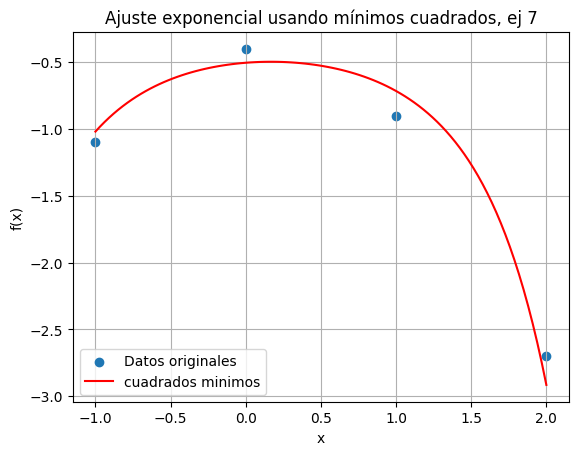

In [14]:
#ej 7, si f(x)=-e^(ax^2+bx+c) ---> Ln(-f(x)) = ax^2+bx+c
x_ej7 = np.array([-1, 0, 1, 2])
y_ej7 = np.array([-1.1, -0.4, -0.9, -2.7])

Ln_negativo = np.log(-y_ej7) #quiero que sea -y porque es -f(x) = -y
coef = cuadrados_minimos(x_ej7, Ln_negativo, 2)
y_interpolado_ej7 = -np.exp(coef[0]*x_grafico**2 + coef[1]*x_grafico +coef[2])

plt.scatter(x_ej7, y_ej7, label='Datos originales')
plt.plot(x_grafico, y_interpolado_ej7, label="cuadrados minimos", color='red')

# Configuración de la gráfica
plt.title('Ajuste exponencial usando mínimos cuadrados, ej 7')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


Ejercicio 8

El radiocarbono, o isótopo $^{14}C$ del carbono $(^{14}\text{C}$), se crea permanentemente en la atmósfera, se incorpora a las plantas a través de la fotosíntesis y a los animales a través de las plantas que ingieren. Una vez que la planta o el animal muere, el $^{14}$C decae radioactivamente siguiendo una ley exponencial decreciente. El archivo $\texttt{carbono14.csv}$ contiene datos simulados de la cantidad de $^{14}$C en una muestra de materia orgánica, desde el momento de la muerte $t = 0$. El tiempo se mide en años.

(a) Ajustar los datos con un polinomio lineal $p $. Graficar $ p $ junto con los datos. A partir del gráfico, decidir si el ajuste es bueno o no.

(b) Ajustar los datos con una función del tipo $ f(x) = ae^{bx} $ y calcular el error $ E = \sum_{i} (y_i - f(x_i))^2 $.

(c) Graficar conjuntamente los datos y los dos ajustes.

In [15]:
#Parte A
data = pd.read_csv("carbono14.csv")
A = data.to_numpy()
print(A)
def cuadrados_minimos(x,y,n):
    A = np.vander(x,n+1) #tiene n+1 columnas porque tiene n+1 coeficientes (n es el grado)
    ATA = A.T@A
    ATb = A.T@y
    coeficientes = np.linalg.solve(ATA, ATb)
    return coeficientes
#la primera columna es el tiempo desde la muerte y la segunda es como decae el carbono 14
x = A[:,0]
y = A[:,1]
pol = cuadrados_minimos(x,y,1)

#defino la grilla para graficar el polinomio
x_grafico = np.linspace(0,14020,10000)
plt.plot(x_grafico,np.poly1d(pol)(x_grafico),color = "red", label ="polinomio lineal aproximador " )
plt.scatter(x,y, label = "datos")
plt.title('Carbono 14')
plt.xlabel('tiempo')
plt.ylabel("decadencia de C14")
plt.legend()
plt.grid(True)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'carbono14.csv'

In [16]:
#B
#parte B, tengo que ajustar los datos para f(x) = ae^bx. si f(x) = ae^bx --> Ln(f(x))=Ln(a) + bx que es una recta
#le tomo logaritmo a todo
y_log = np.log(y)
print(y_log)
pol_parteB = cuadrados_minimos(x,y_log,1) #es una recta que devuelve Ln(a) + bx -- [b,ln(a)] la tupla
a = np.exp(pol_parteB[1]) #a Ln(a) lo vuelvo una exponencial, e^ln(a) = a y con eso recupero a
y_interpolado = a*np.exp(pol_parteB[0]*x_grafico)
plt.scatter(x, y, label='Datos originales')
plt.plot(x_grafico, y_interpolado, label="Aproximacion exponencial por cuadrados minimos", color='red')

# Configuración de la gráfica
plt.title('Ajuste exponencial usando mínimos cuadrados,parte B')
plt.xlabel('tiempo')
plt.ylabel('decadencia de C14')
plt.legend()
plt.grid(True)
plt.show()

[-3.25809654 -2.98455897 -2.67030987 -2.30258509 -1.86321843 -1.32913595
 -0.69314718 -0.10536052 -0.10536052 -0.69314718 -1.32913595 -1.86321843
 -2.30258509 -2.67030987 -2.98455897 -3.25809654]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 16 is different from 10)

In [ ]:
#C
def error(x,y,f): #la f sería tu polinomio aproximador
    error_total = 0
    for i in range(len(y)):
        error = (y[i] - f(x[i]))**2
        error_total += error
    return error_total
def f(x): #es mi polinomio interpolador
    return a*np.exp(pol_parteB[0]*x)
print("el error es", error(x,y,f))

#parte C, tengo que graficarlos al mismo tiempo
plt.scatter(x, y, label='Datos originales')
plt.plot(x_grafico,np.poly1d(pol)(x_grafico),color = "red", label ="polinomio lineal aproximador " )
plt.plot(x_grafico, y_interpolado, color = "green", label="Aproximacion exponencial por cuadrados minimos")
plt.title('Comparación de métodos,parte C')
plt.xlabel('tiempo')
plt.ylabel('decadencia de C14')
plt.legend()
plt.grid(True)
plt.show()

Ejercicio 9.

Considerar $ \text{erf} : \mathbb{R} \rightarrow \mathbb{R} $ la función dada por $ \text{erf}(x) = \frac{2}{\sqrt{\pi}} \int_{0}^{x} e^{-t^2} dt $.

a) Utilizando el comando $\texttt{scipy.special.erf}$ graficar la función en el intervalo $ [-15, 15] $. Observar que $\lim_{{x \to \pm \infty}} \text{erf}(x) = \pm 1 $.


b) Aproximar la función $ \text{erf} $ en el sentido de cuadrados mínimos con polinomios de grado 1, 3 y 5, considerando 20 puntos equiespaciados en el intervalo $[-10, 10] $ . Graficar $ \text{erf} $ junto con estos polinomios en el intervalo $ [-15, 15] $. Observar que la aproximación es mala fuera del intervalo $[-10, 10] $.

c) Se quiere aproximar nuevamente la función $ \text{erf} $ en el sentido de cuadrados mínimos con una combinación lineal de funciones que compartan con $ \text{erf} $ la propiedad de ser acotada e impar. Para ello, ajustar la función $ \text{erf} $ con una función del tipo
$
c_1 x e^{-\frac{x^2}{2}} + c_2 \arctan(x) + c_3 \frac{x}{x^2 + 1},
$

considerando 20 puntos equiespaciados en el intervalo $ [-10, 10] $. Graficar $\text{erf} $ junto a esta aproximación en el intervalo $[-15, 15]$ y comparar con el ítem (b).

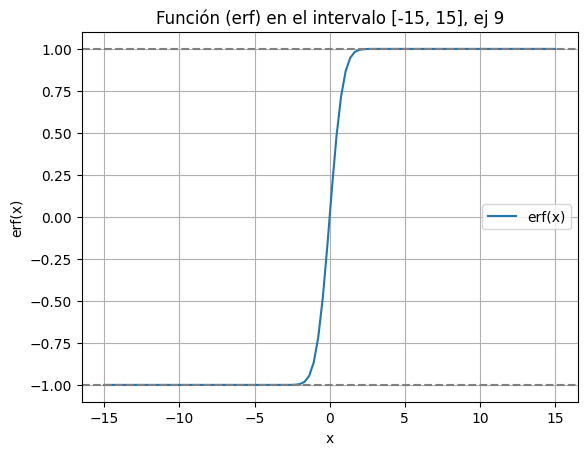

In [17]:
#Parte A
x_ej9 = np.linspace(-15,15,100)
y_ej9 = erf(x_ej9)
plt.plot(x_ej9,y_ej9, label = "erf(x)")
plt.xlabel('x')
plt.ylabel('erf(x)')
plt.title('Función (erf) en el intervalo [-15, 15], ej 9')
plt.grid(True)
plt.axhline(1, color='gray', linestyle='--')
plt.axhline(-1, color='gray', linestyle='--')
plt.legend()
plt.show()

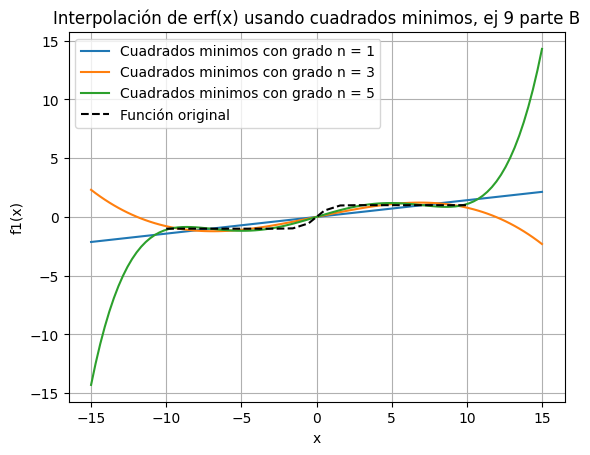

In [18]:
#parte B
x_ej9B = np.linspace(-10,10,20)
y_ej9B = erf(x_ej9B)
n_ej9 = [1,3,5]
for n in n_ej9:
    coef = cuadrados_minimos(x_ej9B, y_ej9B,n)
    plt.plot(x_ej9,np.polyval(coef, x_ej9),label= "Cuadrados minimos con grado n = " + str(n))
plt.plot(x_ej9B, y_ej9B, 'k--', label='Función original')

# Configuración de la gráfica
plt.title('Interpolación de erf(x) usando cuadrados minimos, ej 9 parte B')
plt.xlabel('x')
plt.ylabel('f1(x)')
plt.legend()
plt.grid(True)
plt.show() #queda horrible despues del [-10,10]

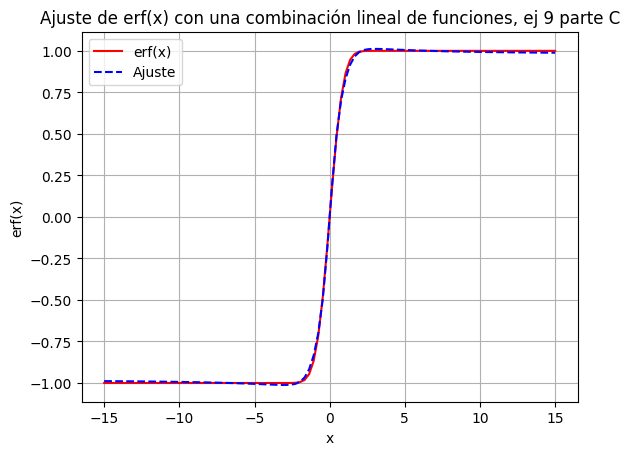

In [19]:
#parte C
def funcion_ajuste(x, c1, c2, c3):
    return c1 * x * np.exp(-x**2) + c2 * np.arctan(x) + c3 * (x / (x**2 + 1))
#uso el comando de scipy que hace cuadrados minimos

parametros,_ = (curve_fit(funcion_ajuste, x_ej9B, y_ej9B)) #devuelve un array (el de los coeficientes) y la matriz de covarianza (que no me importa)
c1,c2,c3 = parametros
plt.plot(x_ej9,y_ej9, label = "erf(x)", color = "red")
plt.plot(x_ej9,funcion_ajuste(x_ej9,c1,c2,c3), color = "blue", label='Ajuste', linestyle='--')
plt.xlabel('x')
plt.ylabel('erf(x)')
plt.title('Ajuste de erf(x) con una combinación lineal de funciones, ej 9 parte C')
plt.grid(True)
plt.legend()
plt.show()